In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.drop('User ID',axis=1,inplace=True)

In [7]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [8]:
df=pd.get_dummies(df,drop_first=True)

In [9]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [11]:
x=df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']

In [12]:
x

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [14]:
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [15]:
y.shape

(400,)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
acc_list=[]
err_list=[]
for i in range (1,25):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

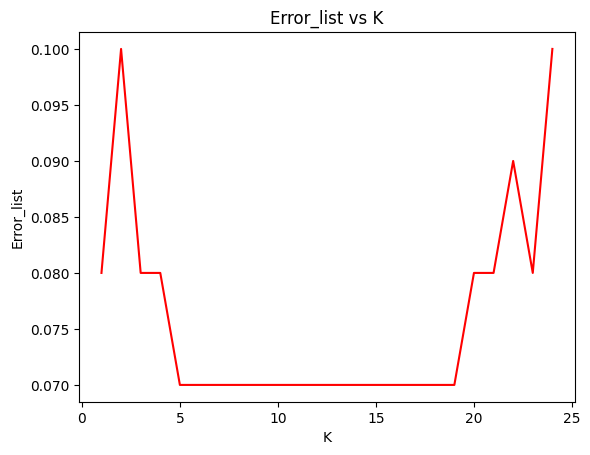

In [25]:
plt.plot(list(range(1,25)),err_list,c='r')
plt.title('Error_list vs K')
plt.xlabel('K')
plt.ylabel('Error_list')
plt.show()

In [26]:
model= KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.93

In [28]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)